In [11]:
from datasets import load_titanic, balance_classes
from tools import model_performance, confusion_matrix
from sklearn.metrics import plot_roc_curve
import pandas as pd

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
df_train, df_test = load_titanic()
df_train.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'target'],
      dtype='object')

In [3]:
train_X = df_train.drop(['name', 'target', 'ticket','cabin'], axis=1)
train_y = df_train['target']
test_X = df_test.drop(['name', 'target', 'ticket','cabin'], axis=1)
test_y = df_test['target']

In [4]:
train_X = pd.get_dummies(train_X)
test_X = pd.get_dummies(test_X)

In [6]:
# kvuli konvergenci
scaler = StandardScaler().fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [8]:
model = LinearDiscriminantAnalysis()
model = model.fit(train_X, train_y)

In [9]:
# Lepsi train score, ale pokles v test score
model_performance(model, train_X, train_y, test_X, test_y)

Train score
0.7968574635241302
Test score
0.9641148325358851


In [12]:
confusion_matrix(model.predict(train_X), train_y, model.predict(test_X), test_y)

Train
TN: 470, TP: 240, FN: 102, FP: 79
Test
TN: 257, TP: 146, FN: 6, FP: 9


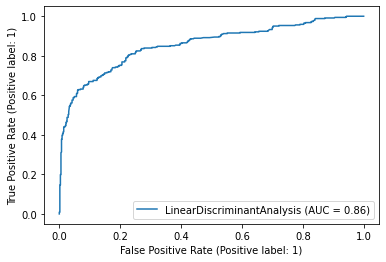

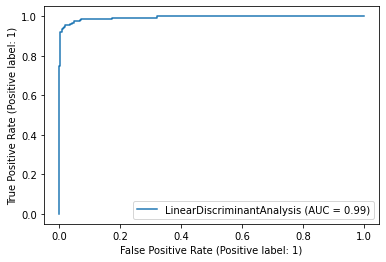

In [13]:
plot_roc_curve(model, train_X, train_y)
plot_roc_curve(model, test_X, test_y)